In [1]:
import networkx as nx
import pandas as pd
import sklearn
from sklearn.cluster import SpectralClustering
import networkx as nx
import matplotlib.pyplot as plt
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from matplotlib import font_manager, rc

In [2]:
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
#노드 설정
import csv
G=nx.Graph()
i=0
nodelist=[]
with open ('class_info.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    print (first_column[i:])
    
    G.add_nodes_from(first_column[i:])
    nodelist.append(first_column[i:])
    i+=1
i=0
cluster=[]
with open ('class_info.txt', 'r') as f:
    second_column = [row[1] for row in csv.reader(f,delimiter='\t')]
    print (second_column[i:])
    cluster.append(second_column[i:])
    i+=1

node=np.append(nodelist,cluster,axis=0)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [4]:
c0=[]
c1=[]
c_1=[]
for i in range(1000):
    if node[1][i]=="-1":
        c_1.append(node[0][i])
    if node[1][i]=="0":
        c0.append(node[0][i])
    if node[1][i]=="1":
        c1.append(node[0][i])

In [5]:
import csv
i=0
edge1=[]
with open ('edge_list.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    edge1.append(first_column[i:])
    i+=1
i=0
edge2=[]
with open ('edge_list.txt', 'r') as f:
    second_column = [row[1] for row in csv.reader(f,delimiter='\t')]
    edge2.append(second_column[i:])
    i+=1
edge=np.append(edge1,edge2,axis=0)
print(edge)
for i in range (len(edge[0])):
    G.add_edges_from([(edge[0][i],edge[1][i])])

[['411' '411' '411' ... '782' '423' '423']
 ['545' '838' '144' ... '144' '3' '3']]


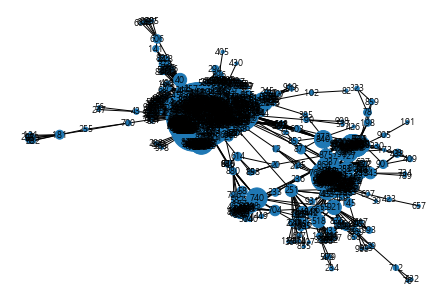

In [6]:
degree=dict(G.degree)
nx.draw(G,font_family=font_name, font_size=9,node_size=[v * 10 for v in degree.values()],with_labels=True)

In [7]:
kern=nx.algorithms.community.kernighan_lin_bisection(G)
print("분류카테고리1")
a=list((set(sorted(kern[0]))-set(c0))-set(c_1))
print(len(a)/len(c1))
b=list((set(sorted(kern[1]))-set(c0))-set(c1))
print(len(b)/len(c_1))
print("분류카테고리2")
a=list((set(sorted(kern[0]))-set(c0))-set(c1))
print(len(a)/len(c_1))
b=list((set(sorted(kern[1]))-set(c0))-set(c_1))
print(len(b)/len(c1))

분류카테고리1
0.5272727272727272
0.5111111111111111
분류카테고리2
0.4888888888888889
0.4727272727272727


In [8]:
from networkx.algorithms import bipartite
spec=bipartite.spectral_bipartivity(G)
adj_matrix = nx.to_numpy_matrix(G) 
node_list = list(G.nodes()) 
clusters = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=0,n_clusters=2).fit_predict(adj_matrix)
classA=[]
classB=[]

for i in range (len(clusters)):
    if clusters[i]==1:
        classA.append(node_list[i])
    else:
        classB.append(node_list[i])
        
print("분류카테고리1")
a=list((set(sorted(classA))-set(c0))-set(c_1))
print(len(a)/len(c1))
b=list((set(sorted(classB))-set(c0))-set(c1))
print(len(b)/len(c_1))
print("분류카테고리2")
a=list((set(sorted(classA))-set(c0))-set(c1))
print(len(a)/len(c_1))
b=list((set(sorted(classB))-set(c0))-set(c_1))
print(len(b)/len(c1))

분류카테고리1
0.2636363636363636
0.8888888888888888
분류카테고리2
0.1111111111111111
0.7363636363636363


In [9]:
a=G.edges()
a=list(a)

In [10]:
for i in range (len(a)):
    print(a[i][1])

851
128
164
144
287
328
238
767
933
600
408
464
504
322
178
930
795
637
769
790
622
976
522
188
169
957
954
601
675
114
267
768
667
986
284
723
54
468
414
816
735
85
703
337
921
488
663
53
251
423
901
39
745
472
124
807
677
310
73
766
843
59
50
763
709
780
894
168
486
594
512
877
834
720
770
554
928
147
837
472
124
807
677
310
73
766
843
466
59
50
763
780
709
168
486
594
106
512
877
720
803
770
928
147
837
545
838
144
319
221
821
580
545
896
294
472
124
807
677
310
73
843
466
213
59
763
571
780
50
168
486
594
512
877
834
720
803
770
554
928
147
837
851
128
164
144
287
328
238
767
933
600
986
875
840
392
851
128
164
144
287
328
238
767
933
600
725
760
216
221
660
545
933
773
547
117
659
653
897
332
439
292
553
534
590
335
83
263
116
545
81
838
144
933
964
717
183
724
194
692
635
666
918
1000
559
674
415
946
866
686
359
940
585
684
625
428
488
949
745
980
227
181
131
70
382
851
128
164
144
287
328
238
767
933
600
369
545
838
144
933
720
306
557
955
650
837
614
158
875
89
794
60
820
963
6

834
720
770
875
798
928
837
518
766
356
934
609
811
486
490
512
472
843
834
948
376
714
463
577
997
709
333
621
702
595
807
677
310
976
763
780
594
466
720
770
928
837
665
539
701
979
564
711
589
912
947
550
696
591
615
915
838
933
592
545
815
476
720
557
766
362
545
838
319
821
545
732
720
472
486
928
650
362
351
604
740
640
411
527
764
952
982
761
461
413
434
623
654
326
818
354
652
749
545
508
821
751
944
370
925
501
538
941
975
752
695
421
402
331
848
765
660
600
967
357
345
874
435
802
937
324
822
942
378
851
328
767
933
600
408
464
504
769
790
622
976
522
957
954
601
637
675
768
667
930
795
723
468
414
816
735
859
545
838
821
545
351
804
747
341
398
801
624
669
476
933
573
838
836
672
964
776
933
751
944
354
749
975
822
791
716
929
544
506
943
786
600
838
933
545
689
863
932
705
839
718
388
926
892
432
639
529
708
598
881
436
425
825
620
673
873
381
958
812
779
634
950
458
706
358
893
774
493
410
611
418
851
973
748
739
767
906
805
846
781
619
757
586
721
482
951
485
916
759
429


In [11]:
data=[]
for i in range(1000000):
    data.append(0)

In [12]:
data=np.array(data)
data=data.reshape(1000,1000)

In [13]:
for i in range (len(a)):
    w=int(a[i][1])-1
    h=int(a[i][0])-1
    data[w][h]=1
    data[h][w]=1

In [14]:
cluster=np.array(cluster).T
train=np.hstack((data,cluster))

In [72]:
X=[]
Y=[]
X_test=[]
for i in range(1000):
    if train[i][1000]=="1":
        X.append(train[i][0:1000])
        Y.append(train[i][1000])
    if train[i][1000]=="-1":
        X.append(train[i][0:1000])
        Y.append(0)
        #Y.append(train[i][1000])
    if train[i][1000]=="0":
        X_test.append(train[i][0:1000])
        print(i)
X=np.array(X)
Y=np.array(Y)
X_test=np.array(X_test)

0
1
2
3
4
7
9
10
11
12
13
17
19
20
21
22
23
24
26
27
28
29
31
33
34
36
38
39
41
42
43
44
45
46
47
48
49
50
51
52
54
55
56
57
58
59
60
63
64
65
66
67
68
69
71
73
74
75
76
77
78
79
80
81
82
84
85
86
89
90
91
92
93
94
95
97
98
99
101
103
104
105
106
107
108
109
110
112
113
115
118
120
122
123
124
125
126
127
128
129
130
131
132
133
134
136
137
138
139
141
142
143
144
145
146
147
148
150
151
152
153
155
156
157
158
159
160
163
165
166
167
168
170
171
174
175
176
177
178
179
180
181
183
184
185
186
187
188
189
190
192
194
195
196
198
199
200
201
202
203
205
206
207
208
209
210
213
215
216
217
218
220
221
222
223
224
225
226
227
229
231
232
233
236
237
238
240
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
261
262
263
264
265
266
267
269
270
271
272
273
274
275
277
279
280
281
282
284
285
286
289
290
291
292
293
294
295
296
297
298
300
301
302
303
304
305
306
307
308
309
310
312
313
314
315
316
317
318
319
320
321
322
324
326
327
328
331
333
334
335
336
337
338
339
340
341
3

In [43]:
Y=Y.reshape(200,1)

In [44]:
Y[1]

array(['1'], dtype='<U1')

In [17]:
import keras
from keras.models import Sequential
import keras.backend.tensorflow_backend as K
from keras.callbacks import EarlyStopping
from keras.layers.core import Dense,Dropout
from keras.layers import SimpleRNN,LSTM,Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from keras import initializers
from keras.models import load_model
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import os

Using TensorFlow backend.


In [27]:
Y[1]

'1'

In [ ]:
with K.tf.device('/cpu:0'):
    n=1
    m=1
    es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=150)
    mc = ModelCheckpoint(filepath="dnn_learning_"+str(m)+"_"+str(n)+".h5", monitor='val_loss', mode='min', save_best_only=True)
    l1=tf.keras.regularizers.l1_l2(l1=1e-8,l2=1e-7)
    for i in range (100):
        t=n
        model = Sequential()
        model.add(Dense((t),kernel_initializer='he_uniform',input_dim=1000, activation='relu'))
        model.add(Dense(1))
        adam=keras.optimizers.Adam(lr=0.001, amsgrad=False)
        model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
        model.fit(X, Y, validation_split=0.1,epochs=1000, verbose=0,callbacks=[es,mc])
        model.save("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        print(t)
        n=n+1
    n=1
    m=m+1
    for i in range (100):
        t=n
        model = Sequential()
        model.add(Dense((t),kernel_initializer='he_uniform',input_dim=1000, activation='relu'))
        model.add(Dense((t),activation='softmax',kernel_regularizer='l1'))
        model.add(Dense(1))
        adam=keras.optimizers.Adam(lr=0.001, amsgrad=False)
        model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
        model.fit(X, Y, validation_split=0.1, epochs=1000, verbose=0,callbacks=[es,mc])
        model.save("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        print(t)
        n=n+1
        
    n=1
    m=m+1
    for i in range (100):
        t=n
        model = Sequential()
        model.add(Dense((t),kernel_initializer='he_uniform',input_dim=1000, activation='relu'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='softmax',kernel_regularizer='l1'))
        model.add(Dense(1))
        adam=keras.optimizers.Adam(lr=0.001, amsgrad=False)
        model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
        model.fit(X, Y, validation_split=0.1, epochs=1000, verbose=0,callbacks=[es,mc])
        model.save("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        print(t)
        n=n+1
    n=1
    m=m+1
    for i in range (100):
        t=n
        model = Sequential()
        model.add(Dense((t),kernel_initializer='he_uniform',input_dim=1000, activation='relu'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='softmax',kernel_regularizer='l1'))
        model.add(Dense(1))
        adam=keras.optimizers.Adam(lr=0.001, amsgrad=False)
        model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
        model.fit(X, Y, validation_split=0.1, epochs=1000, verbose=0,callbacks=[es,mc])
        model.save("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        print(t)
        n=n+1
    n=1
    m=m+1
    for i in range (100):
        t=n
        model = Sequential()
        model.add(Dense((t),kernel_initializer='he_uniform',input_dim=1000, activation='relu'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='relu',kernel_regularizer='l1'))
        model.add(Dense((t),activation='softmax',kernel_regularizer='l1'))
        model.add(Dense(1))
        adam=keras.optimizers.Adam(lr=0.001, amsgrad=False)
        model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
        model.fit(X, Y, validation_split=0.1, epochs=1000, verbose=0,callbacks=[es,mc])
        model.save("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        print(t)
        n=n+1

In [50]:
with K.tf.device('/cpu:0'):
    n=1
    m=1
    for i in range (100):
        t=n
        score=0
        y_result=[]
        print("dnn_learning_"+str(m)+"_"+str(n))
        model1=load_model("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        y_result=model1.predict(X)
        y_result=np.array(y_result)
        y_result=y_result.reshape(200,1)

        for i in range(200):
            if int(Y[i])==int(y_result[i]):
                score+=1
        print(score)
        n+=1
    n=1
    m=m+1
    for i in range (100):
        t=n
        score=0
        y_result=[]
        print("dnn_learning_"+str(m)+"_"+str(n))
        model1=load_model("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        y_result=model1.predict(X)
        y_result=np.array(y_result)
        y_result=y_result.reshape(200,1)

        for i in range(200):
            if int(Y[i])==int(y_result[i]):
                score+=1
        print(score)
        n+=1
    n=1
    m=m+1
    for i in range (100):
        t=n
        score=0
        y_result=[]
        print("dnn_learning_"+str(m)+"_"+str(n))
        model1=load_model("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        y_result=model1.predict(X)
        y_result=np.array(y_result)
        y_result=y_result.reshape(200,1)

        for i in range(200):
            if int(Y[i])==int(y_result[i]):
                score+=1
        print(score)
        n+=1
    n=1
    m=m+1
    for i in range (100):
        t=n
        score=0
        y_result=[]
        print("dnn_learning_"+str(m)+"_"+str(n))
        model1=load_model("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        y_result=model1.predict(X)
        y_result=np.array(y_result)
        y_result=y_result.reshape(200,1)

        for i in range(200):
            if int(Y[i])==int(y_result[i]):
                score+=1
        print(score)
        n+=1
    n=1
    m=m+1
    for i in range (100):
        t=n
        score=0
        y_result=[]
        print("dnn_learning_"+str(m)+"_"+str(n))
        model1=load_model("dnn_learning_"+str(m)+"_"+str(n)+".h5")
        y_result=model1.predict(X)
        y_result=np.array(y_result)
        y_result=y_result.reshape(200,1)

        for i in range(200):
            if int(Y[i])==int(y_result[i]):
                score+=1
        print(score)
        n+=1

dnn_learning_1_1
173
dnn_learning_1_2
179
dnn_learning_1_3
181
dnn_learning_1_4
89
dnn_learning_1_5
165
dnn_learning_1_6
158
dnn_learning_1_7
155
dnn_learning_1_8
146
dnn_learning_1_9
176
dnn_learning_1_10
174
dnn_learning_1_11
177
dnn_learning_1_12
186
dnn_learning_1_13
171
dnn_learning_1_14
181
dnn_learning_1_15
172
dnn_learning_1_16
173
dnn_learning_1_17
169
dnn_learning_1_18
148
dnn_learning_1_19
182
dnn_learning_1_20
172
dnn_learning_1_21
171
dnn_learning_1_22
168
dnn_learning_1_23
180
dnn_learning_1_24
185
dnn_learning_1_25
165
dnn_learning_1_26
181
dnn_learning_1_27
182
dnn_learning_1_28
160
dnn_learning_1_29
170
dnn_learning_1_30
171
dnn_learning_1_31
173
dnn_learning_1_32
167
dnn_learning_1_33
177
dnn_learning_1_34
174
dnn_learning_1_35
162
dnn_learning_1_36
170
dnn_learning_1_37
167
dnn_learning_1_38
160
dnn_learning_1_39
171
dnn_learning_1_40
169
dnn_learning_1_41
174
dnn_learning_1_42
171
dnn_learning_1_43
182
dnn_learning_1_44
173
dnn_learning_1_45
169
dnn_learning_1_46
16

90
dnn_learning_4_88
90
dnn_learning_4_89
90
dnn_learning_4_90
90
dnn_learning_4_91
90
dnn_learning_4_92
90
dnn_learning_4_93
90
dnn_learning_4_94
90
dnn_learning_4_95
90
dnn_learning_4_96
90
dnn_learning_4_97
90
dnn_learning_4_98
90
dnn_learning_4_99
90
dnn_learning_4_100
90
dnn_learning_5_1
90
dnn_learning_5_2
90
dnn_learning_5_3
0
dnn_learning_5_4
90
dnn_learning_5_5
90
dnn_learning_5_6
90
dnn_learning_5_7
90
dnn_learning_5_8
193
dnn_learning_5_9
90
dnn_learning_5_10
90
dnn_learning_5_11
90
dnn_learning_5_12
90
dnn_learning_5_13
90
dnn_learning_5_14
90
dnn_learning_5_15
90
dnn_learning_5_16
90
dnn_learning_5_17
90
dnn_learning_5_18
90
dnn_learning_5_19
90
dnn_learning_5_20
90
dnn_learning_5_21
90
dnn_learning_5_22
90
dnn_learning_5_23
90
dnn_learning_5_24
90
dnn_learning_5_25
90
dnn_learning_5_26
90
dnn_learning_5_27
90
dnn_learning_5_28
90
dnn_learning_5_29
90
dnn_learning_5_30
90
dnn_learning_5_31
90
dnn_learning_5_32
90
dnn_learning_5_33
90
dnn_learning_5_34
90
dnn_learning_5_35


In [75]:
t=n
score=0
y_result=[]
print("dnn_learning_"+str(5)+"_"+str(8))
model1=load_model("dnn_learning_"+str(5)+"_"+str(8)+".h5")
y_result=model1.predict(X_test)
y_result=np.array(y_result)
y_result=y_result.reshape(800,1)

for i in range(800):
    print(int(y_result[i]))


dnn_learning_5_8
1
0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1